<a href="https://colab.research.google.com/github/ramos453/Data_Analyst_Jobs_Analysis/blob/main/Data_Analyst_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For my project I decide to look at data analyst job information. This dataset is provided by Kaggle. It includes over 2000 job posting from Glassdoor, a popular job search platform. As I'm looking for a position as a data analyst, I'm hoping this project might aid my thought process when applying to jobs. The dataset is about ~7MB and is attached in the repository. I hope you enjoy the project.

I will break down the research question below which I hope to answer through my analysis.

1) What factors influence salary the most
- do larger companies offer larger salaries
- does the industry heavily influence the salary
- does location effect salary  

2) What factors might influence rating the most
- Glassdoor is known for their employee ratings that help future candidates asses companies in terms of work environment and so on.
- Are salary and rating correlated
- Is location, industry,etc... predictive of employee rating


For my analysis I will use data cleaning techiques (tidy data, pandas), visualization (seaborn, matplotlib), linear regression (Topic 12),, Classification(Topic 13) and Clustering (Topic 14) learned in this course.


The first step is to load the necessary packages.

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import spacy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


The following code cell reads the data and prints the column names.
Below is a break down of each column and its meaning.

Job Title: String specifying Job Title

Salary Estimate: String containing a range of Salaries (300,000 - 500,000)

Job Description: String describing the position and responsibiliies

Rating: Float, Glassdoor generated rating based on past employee reviews

Company Name: String, Company Name

Headquarters: String, City name and State name

Size: String, number of employees

Founded: Integer, year founded

Type of ownership: String, ownership structure

Industry: String, Industry

Sector: String, Sector

Revenue: String, Revenue per year

Competitors: String, Name of competitors (-1, if no competitors)

Easy Apply: String, Glassdoor easy apply function (-1, if Easy Apply not possible)

In [ ]:
#Reading the data
data = pd.read_csv("DataAnalyst.csv")

In [ ]:
#Intial View of data
data.head(20)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
6,6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1
9,9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1


In [ ]:
pd.set_option('display.max_colwidth', None)

After seeing an initial view of the data, it is clear that some data cleaning is necessary to transform the data into appropiate input for linear regression, classification and clustering models. It is important to perform exploratory data analysis on each column to better understand the data.  

The following code cell drops the "Unamed" column since a default index is provided already.

In [ ]:
data.drop('Unnamed: 0', axis =1, inplace = True)

The goal for this next subsection is inspect individual columns and apply logical transfromations as well as to discover relationships between the data.



In [ ]:
data['Salary Estimate'].unique()

array(['$37K-$66K (Glassdoor est.)', '$46K-$87K (Glassdoor est.)',
       '$51K-$88K (Glassdoor est.)', '$51K-$87K (Glassdoor est.)',
       '$59K-$85K (Glassdoor est.)', '$43K-$76K (Glassdoor est.)',
       '$60K-$110K (Glassdoor est.)', '$41K-$78K (Glassdoor est.)',
       '$45K-$88K (Glassdoor est.)', '$73K-$127K (Glassdoor est.)',
       '$84K-$90K (Glassdoor est.)', '$27K-$52K (Glassdoor est.)',
       '$42K-$74K (Glassdoor est.)', '$77K-$132K (Glassdoor est.)',
       '$98K-$114K (Glassdoor est.)', '$48K-$96K (Glassdoor est.)',
       '$26K-$47K (Glassdoor est.)', '$31K-$59K (Glassdoor est.)',
       '$47K-$81K (Glassdoor est.)', '$43K-$69K (Glassdoor est.)',
       '$49K-$112K (Glassdoor est.)', '$30K-$54K (Glassdoor est.)',
       '$55K-$103K (Glassdoor est.)', '$37K-$70K (Glassdoor est.)',
       '$57K-$103K (Glassdoor est.)', '$35K-$45K (Glassdoor est.)',
       '$42K-$66K (Glassdoor est.)', '$65K-$81K (Glassdoor est.)',
       '$113K-$132K (Glassdoor est.)', '$42K-$63K (Glas

The following code cell looks into the "Salary Estimate" column.

To prepare this data, two columns can replace the current column. These two new columns will hold the lower salary expectation and higher salary expectation as a float. The two new columns will represent the range of expect salaries for the position in thousands. The following code cell performs this transformation.

In [ ]:
data['Low_Salary'] = data['Salary Estimate'].str.extract(r'\$(\d+)K-\$\d+K').astype(float)
data['High_Salary'] = data['Salary Estimate'].str.extract(r'\$\d+K-\$(\d+)K').astype(float)
data.drop('Salary Estimate', axis =1, inplace = True)

If you decide to run the cell above more than once, please remeber to restart and re-run all as the dropping of columns will cause an error when re-running.

# **Job** **Title**

The following code cell looks into the "Job Title" column to see if there are any beneficial transformations to be applied.

In [ ]:
len(data['Job Title'].unique())
for i in data['Job Title'].head(30).unique():
  print(i)

Data Analyst, Center on Immigration and Justice (CIJ)
Quality Data Analyst
Senior Data Analyst, Insights & Analytics Team [Customer Operations]
Data Analyst
Reporting Data Analyst
Business/Data Analyst (FP&A)
Data Science Analyst
Data Analyst, Merchant Health
DATA ANALYST
Senior Data Analyst
Investment Advisory Data Analyst
Sustainability Data Analyst
Clinical Data Analyst
DATA PROGRAMMER/ANALYST
Product Analyst, Data Science
Data Analyst - Intex Developer
Entry Level / Jr. Data Analyst
Data + Business Intelligence Analyst
Data Analyst, Product
Data Analyst Entry Level


In [ ]:
data['job_title_length'] = data['Job Title'].apply(len)

In [ ]:
data['job_title_length'].unique()

array([ 53,  20,  68,  12,  22,  28,  29,  19,  32,  27,  21,  23,  30,
        36,  24,  37,  52,  57,  43,  15,  31,  46,  26,  14,  42,  34,
        25,  38,  63,  66,  16,  33,  35,  41,  59,  51,  49,  47,  56,
        45,  44,  54,  39,  17,  62,  78,  48,  50,  79,  55,  18, 106,
        65, 115,  58,  40,  69,  61, 100,  73,  86,  83,  70,  88,  60,
        81,  13,  90,  76, 118,  93,  99,  67,  80,  64,  95,  75,  71,
       114,  72, 107,  97])

In [ ]:
def bin_length(length):
    return (length // 10) * 10

data['Length_Group'] = data['job_title_length'].apply(bin_length)
job_title_length_data = data.groupby('Length_Group').agg({
    'Length_Group': 'count',
    'High_Salary': 'mean',
    'Low_Salary': 'mean',
    'Rating': 'mean'
})
job_title_length_data.columns = ['Count', 'Average High Salary', 'Average Low Salary', 'Average Rating']

In [ ]:
job_title_length_data

,Count,Average High Salary,Average Low Salary,Average Rating
Length_Group,,,,
10,770,88.968831,53.161039,3.289870
20,653,89.267994,54.509954,3.080704
30,421,91.714964,55.524941,3.086461
40,210,94.540670,56.047847,3.169048
50,101,87.069307,53.029703,2.924752
60,47,86.319149,51.127660,3.431915
70,23,93.260870,54.608696,3.391304
80,14,91.428571,54.500000,2.450000
90,8,88.125000,62.250000,2.150000


# Job Description

The next cell looks into the "Job Description" column.

In [ ]:
data['Job Description'].head(3)

0    Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems tha

As one can imagine, quantifying job description could prove difficult. To quanitify job descriptions a bag of words approach can be used. Counting the amount of key words in each job description can help in observing correlation between job description and salary expectations.

In [ ]:

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract skills from job description
def extract_skills(job_description):
    doc = nlp(job_description)
    skills = [entity.text for entity in doc.ents if entity.label_ in ["ORG", "SKILL"]]
    return skills

# Apply the function to the 'Job Description' column
data['skills'] = data['Job Description'].apply(extract_skills)

# Display the resulting DataFrame
data[['Job Description', 'skills']].head(2)


Job Description  \
0  Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems that impede human dignity and justice.\nWe pilot solutions that are at once transformative and achievable.\nWe engage diverse communities in informed debate.\nAnd we harness the power of evidence to drive effective policy and practice\nWhat were doing:\n\nWe are helping to build a movementamong government leaders, advocates, and the immigration legal services communitytowards universal legal representation for immigrants facing deportation. In the face of stepped-up immigration enforcement, millions of non-citizens are at risk of extended detention and permanent separation from their families and communities. Veras Center on Immigration and Justice (CIJ) partners with government, non-profit partners, and communities to improve government systems that affect immigrants and their families. CIJ administers several nationwide legal services programs for immigrants facing deportation, develops and implements pilot programs, provides technical assistance, and conducts independent research and evaluation.\n\nThats where you come in:\nThe Data Analyst will support the Centers programmatic efforts through regular monitoring and reporting of federal government and subcontractor data. CIJ manages several proprietary databases that run on AWS and Caspio and uses SQL, R, and Python to manage data. This is an opportunity to help shape an innovative national research and policy agenda as part of a dedicated team of experts working to improve access to justice for non-citizens.\n\nVera seeks to hire a Data Analyst to work on various data management projects with its Center on Immigration and Justice (CIJ). In collaboration with other Data Analysts, this position will involve work across several projects, such as the Unaccompanied Childrens Program (UCP), a program to increase legal representation for immigrant children facing deportation without a parent or legal guardian. The position may cover additional duties for the Legal Orientation Program for Custodians (LOPC), which educates the custodians of unaccompanied children about their rights and the immigration court process.\n\nAbout the role:\n\nAs a Data Analyst, you will report to a member of the research team and work in close collaboration with other Vera staff on ongoing database management, monitoring, reporting, and analysis projects. Youll support the team by taking ownership of ongoing monitoring and reporting tasks involving large data sets. Other principal responsibilities will include:\nSupporting research staff by preparing large datasets for analysis, including merging, cleaning, and recoding data;\nProviding insights into program performance through summary statistics and performance indicators;\nProducing timely reports on Vera projects for team members and stakeholders;\nImproving recurring reporting processes by optimizing code and producing subsequent documentation;\nCoordinating database management tasks such as participating in new database design, modifying existing databas

In [ ]:
pd.set_option('display.max_colwidth', 50)

In [ ]:
def count_skills(skills):
    return len(skills)
data['skill_count'] = data['skills'].apply(count_skills)
data[['skills', 'skill_count']].head(10)


,skills,skill_count
0,"[The Data Analyst, Veras Center on Immigration, CIJ, Vera, The Vera Institute, Veras Center on Immigration and Justice, CIJ, CIJ, The Data Analyst, Centers, CIJ, AWS, SQL, Vera, Center on Immigration and Justice, CIJ, Data Analysts, the Unaccompanied Childrens Program, the Legal Orientation Program for Custodians (LOPC, Vera, Vera, Git/GitHub, PDF, CIJ, CIJ Data, Vera Institute of Justice, NY, Vera, Vera]",29
1,"[Quality Management, Quality Incentive, Quality Improvement, Quality Management, CHOICE Clinical Operations and Business Intelligence & Analytics, Quality Incentive, Quality Improvement, Education, Business Intelligence & Analytics, Communicates, MicroStrategy, Retrieves, Quality Management, BIA, SQL, PL/SQL, SAS, Microsoft Word, PowerPoint]",19
2,"[Senior Data Analyst, the Insights & Analytics, Customer Operations, Customer Operations, Data Engineering, the Data Science, the Insights & Analytics, Customer Operations, BI, Execute, SQL, Customer Operations, Customer Operations, Data Engineering, SQL, BI, Bachelor, Squarespace, Squarespace, Squarespace, Squarespace]",21
3,"[Digital Strategy, Technology, Business Transformation, COVID-19, Celerity, SQL, SQL, ETL, Data Visualization, • Strong, Celerity, Celerity, Celerity, AUSY, Celerity, healthcare, Instagram, Facebook, Dribbble, Celerity, Celerity]",18
4,"[FanDuel Group, FanDuel, FanDuel Group, FanDuel, TVG, FanDuel Casino & Betfair Casino, PokerStars, Reporting Data Analyst, SQL, Bachelor, SQL, Desire, FanDuel Group, FanDuel]",14
5,"[Cubist Systematic Strategies, Cubist, Data Services, Portfolio Managers, Data Scientists/Analysts, Job Responsibilities\nIdentifying, Assisting Data, FTP, Assisting Data Team, SQL, Microsoft Outlook]",11
6,"[Financial Planning and Analysis, Management Committee, Bachelor, Finance/Computer Science/Engineering/Mathematics, SQL]",5
7,"[Data Science Analyst, NY, Information Technology\nDescription\nGreater New York Mutual Insurance Company, GNY, Data Science Analyst, Analyze, New Business Score Engine - daily\nDevelop, Bachelor, Data Science, Statistics, Applied Mathematics or Computer Science, SQL]",11
8,"[The Data Analyst, The Data Analyst, DMGT, the London Stock Exchange, Develop, Develop, Evaluate, Operations, Skills\n\nRequired:, SQL, Python\nPossess, Digital, BigQuery, MailOnline, MailOnline, Dailymail.com, DMGT, the London Stock Exchange]",18
9,"[AI, Merchant Health Team, SQL, Cooperate, Visa, SQL]",6


In [ ]:
data.to_csv('Data_Analyst_Jobs_v1.csv', index=False)

In [ ]:
data['skill_count'].unique()

array([29, 19, 21, 18, 14, 11,  5,  6, 16, 15,  9, 12, 10, 17, 13,  4,  3,
        2, 22, 25,  7, 38,  8, 28, 20, 47, 23, 45,  1, 41, 44, 27, 52, 40,
       46, 32, 26, 36, 39, 24, 42, 30,  0, 35, 34, 49, 60, 43, 82, 71, 31,
       57, 33, 37, 53, 59, 48, 55, 76])

In [ ]:
def bin_skills(skills):
    return (skills // 5) * 5
data['Skills_Group'] = data['skill_count'].apply(bin_skills)
Skills_data = data.groupby('Skills_Group').agg({
    'Skills_Group': 'count',
    'High_Salary': 'mean',
    'Low_Salary': 'mean',
    'Rating': 'mean'
})
Skills_data.columns = ['Count', 'Average High Salary', 'Average Low Salary', 'Average Rating']
Skills_data

,Count,Average High Salary,Average Low Salary,Average Rating
Skills_Group,,,,
0,217,92.520737,56.096774,3.056221
5,624,91.908654,55.256410,3.350801
10,545,88.045956,53.137868,2.989541
15,393,89.162850,54.414758,3.170229
20,212,90.636792,53.353774,3.060377
25,113,86.309735,51.407080,3.215929
30,64,91.750000,56.125000,2.932812
35,37,90.270270,56.189189,3.178378
40,23,87.043478,54.043478,3.443478


The following code cell contains a bag of words which may help identify higher paying jobs. These advanced skills and topics will likely correlate to higher paying jobs.

In [ ]:
bag_of_words = [
    "Advanced Analytics", "Predictive Modeling", "Machine Learning",
    "Data Science", "Artificial Intelligence", "Big Data",
    "Deep Learning", "Statistical Analysis", "Algorithm Development",
    "Business Intelligence", "Data Mining", "Python",
    "R Programming", "SQL", "Hadoop", "Master","PHD","Bachelors", "Degree", "Mathematics", "Statistic", "Quantitive", "Research"]

The following code cell counts the number of keywords found in each job description.

In [ ]:
# Column for keyword count
data['Job Description Keyword Count'] = data['Job Description'].apply(
    lambda description: sum(word in description for word in bag_of_words)
)

This code cell finds the job description with the highest number of keywords.

In [ ]:
data.loc[data['Job Description Keyword Count'].idxmax()]

Job Title                                    Analyst IV Systems - Data Engineering
Job Description                  About Retail Business Services\nRetail Busines...
Rating                                                                         3.9
Company Name                                    Retail Business Services, LLC\n3.9
Location                                                                chicago il
Headquarters                                                          salisbury nc
Size                                                        1001 to 5000 employees
Founded                                                                         -1
Type of ownership                                                 Company - Public
Industry                                                    Food & Beverage Stores
Sector                                                                      Retail
Revenue                                                   Unknown / Non-Applicable
Comp

The following code cell plots the number of keywrds found in each job description to the salary expectations for that job.

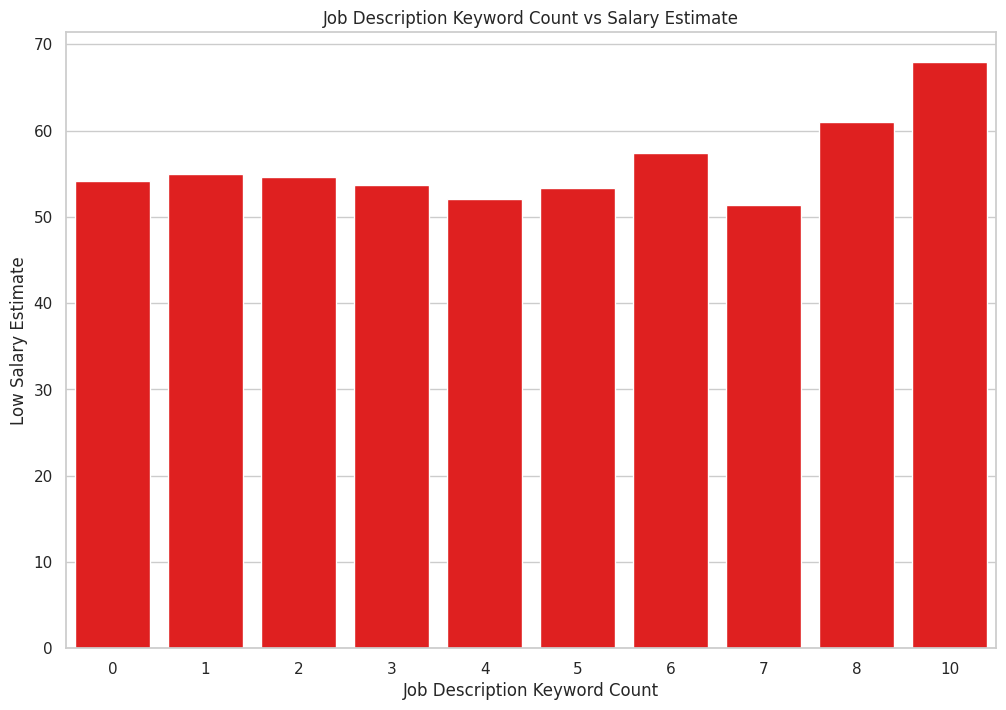

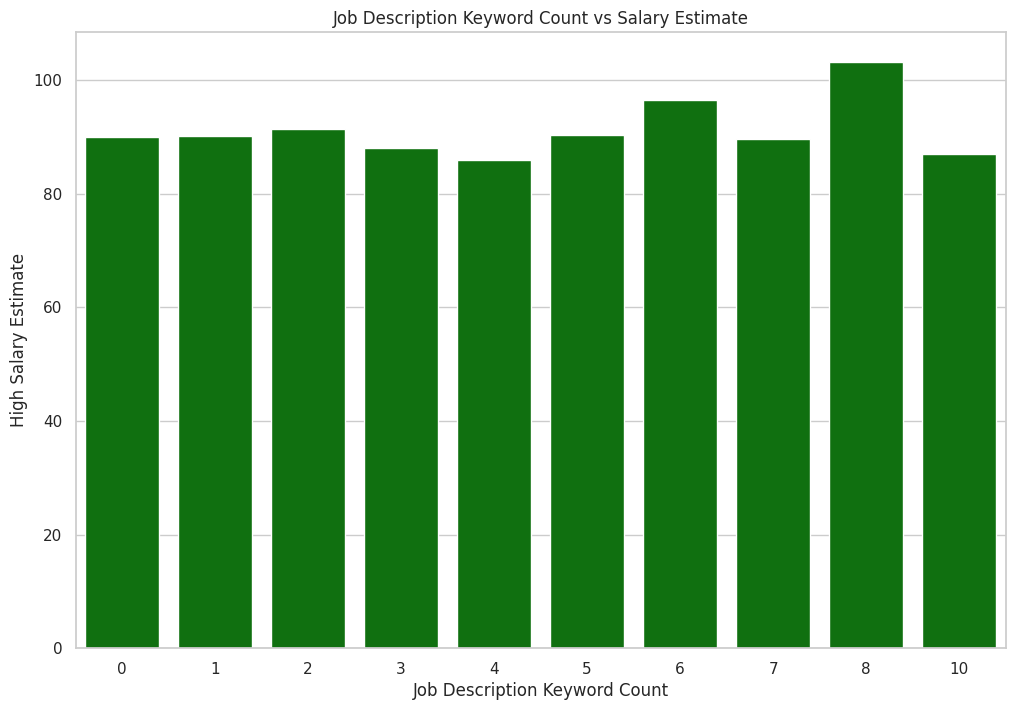

In [ ]:
sb.set(style="whitegrid")
keyword_mean_low = data.groupby('Job Description Keyword Count')['Low_Salary'].mean().reset_index(name='Mean')
plt.figure(figsize=(12, 8))
sb.barplot(x='Job Description Keyword Count', y='Mean', data=keyword_mean_low, color = "Red")
plt.xlabel('Job Description Keyword Count')
plt.ylabel('Low Salary Estimate')
plt.title('Job Description Keyword Count vs Salary Estimate')
plt.show()

keyword_mean_low = data.groupby('Job Description Keyword Count')['High_Salary'].mean().reset_index(name='Mean')
plt.figure(figsize=(12, 8))
sb.barplot(x='Job Description Keyword Count', y='Mean', data=keyword_mean_low, color = "Green")
plt.xlabel('Job Description Keyword Count')
plt.ylabel('High Salary Estimate')
plt.title('Job Description Keyword Count vs Salary Estimate')
plt.show()

This chart suggest that the number of keywords found has no clear correlation with higher or lower salary expectations.

# Rating

The following code cells looks at the "Rating" column

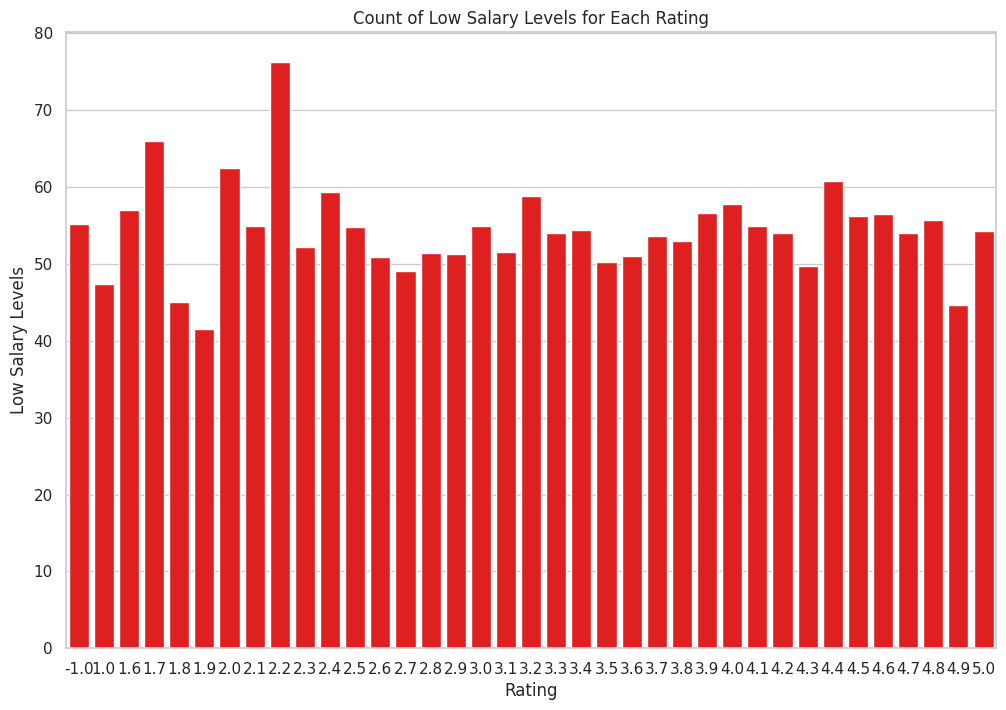

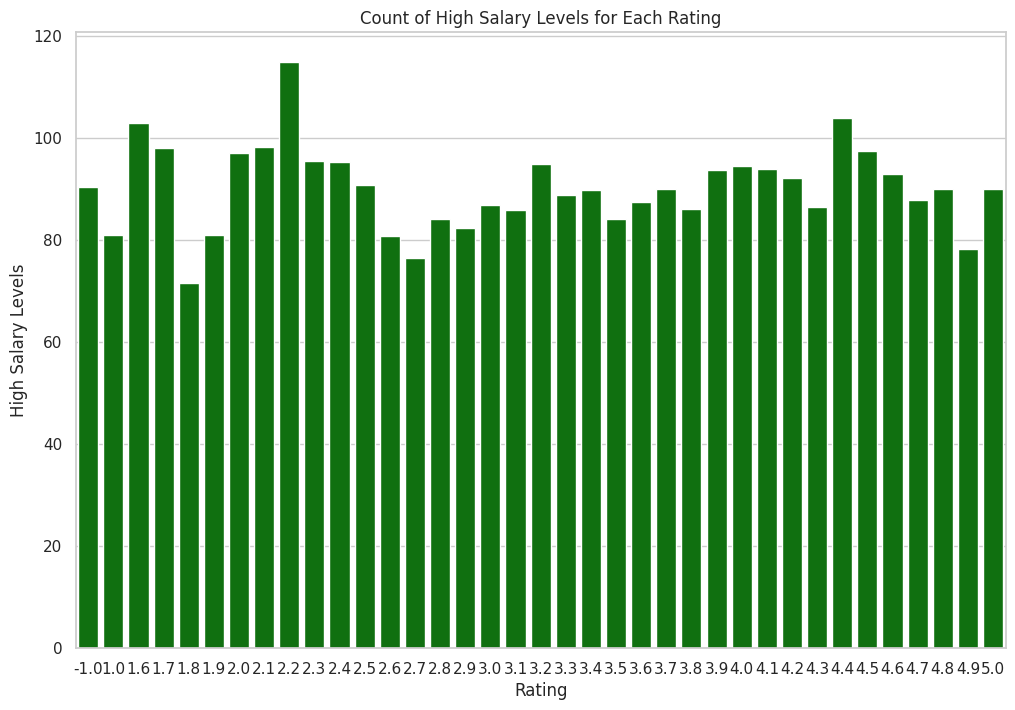

In [ ]:

sb.set(style="whitegrid")
plt.figure(figsize=(12, 8))
rating_mean_low = data.groupby('Rating')['Low_Salary'].mean().reset_index(name='Mean')
sb.barplot(x='Rating', y='Mean', data=rating_mean_low, color = "Red")
plt.xlabel('Rating')
plt.ylabel('Low Salary Levels')
plt.title('Count of Low Salary Levels for Each Rating')
plt.show()

sb.set(style="whitegrid")
plt.figure(figsize=(12, 8))
rating_mean_high = data.groupby('Rating')['High_Salary'].mean().reset_index(name='Mean')
sb.barplot(x='Rating', y='Mean', data=rating_mean_high, color = "Green")
plt.xlabel('Rating')
plt.ylabel('High Salary Levels')
plt.title('Count of High Salary Levels for Each Rating')
plt.show()


# Location

The following cell splits "Location" into "Location_City" and "Location_State", therefore allowing for a more general understanding of state vs expected salary correlation.

In [ ]:
data['Location'] = data['Location'].str.lower().str.replace(',', '')
data[['Location_City', 'Location_State']] = data['Location'].str.extract(r'(.+?)\s*([a-zA-Z]{2})$')
data['Location_City'] = data['Location_City'].str.strip()
data[['Location', 'Location_City', 'Location_State']].head()


,Location,Location_City,Location_State
0,new york ny,new york,ny
1,new york ny,new york,ny
2,new york ny,new york,ny
3,new york ny,new york,ny
4,new york ny,new york,ny


From the two charts below it is clear that states have different average salaries. Therefore, the "Location" of a job is likely an important predictor of expected salary.

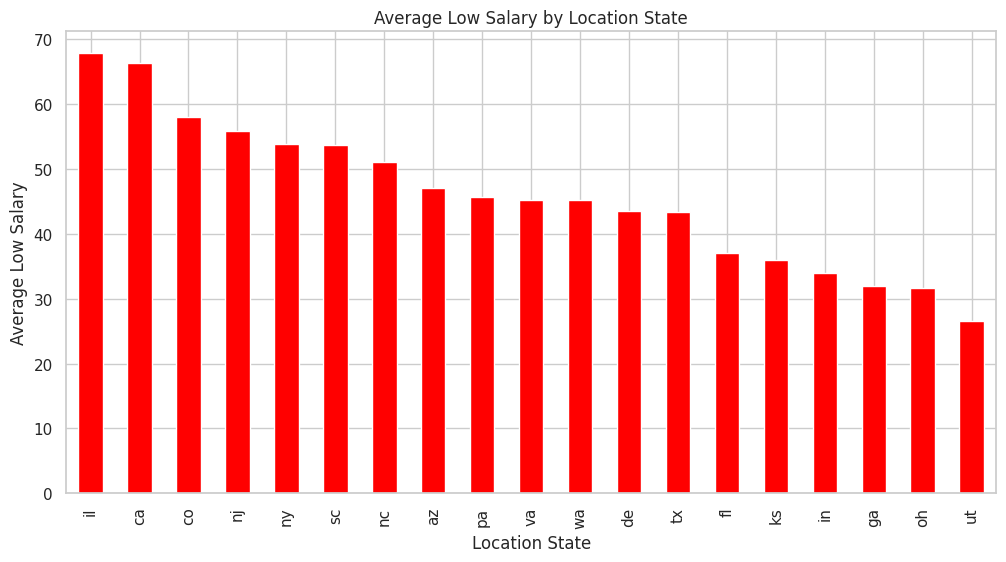

In [ ]:
average_low_salary_by_state = data.groupby('Location_State')['Low_Salary'].mean()
average_low_salary_by_state = average_low_salary_by_state.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_low_salary_by_state.plot(kind='bar', color='red')
plt.title('Average Low Salary by Location State')
plt.xlabel('Location State')
plt.ylabel('Average Low Salary')
plt.show()

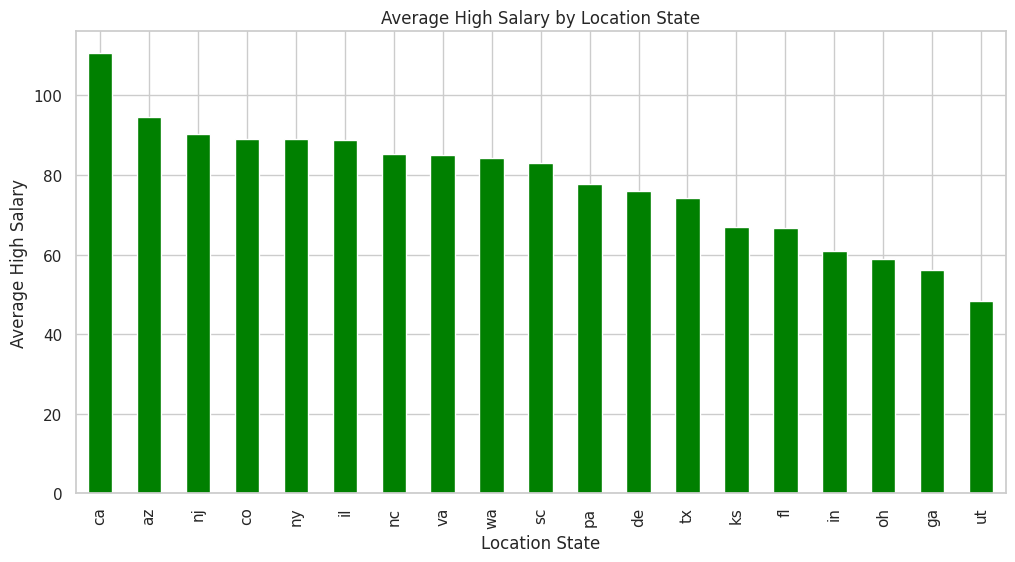

In [ ]:
average_low_salary_by_state = data.groupby('Location_State')['High_Salary'].mean()
average_low_salary_by_state = average_low_salary_by_state.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_low_salary_by_state.plot(kind='bar', color='green')
plt.title('Average High Salary by Location State')
plt.xlabel('Location State')
plt.ylabel('Average High Salary')
plt.show()

In [ ]:
data['Salary_range'] = data['High_Salary']-data['Low_Salary']


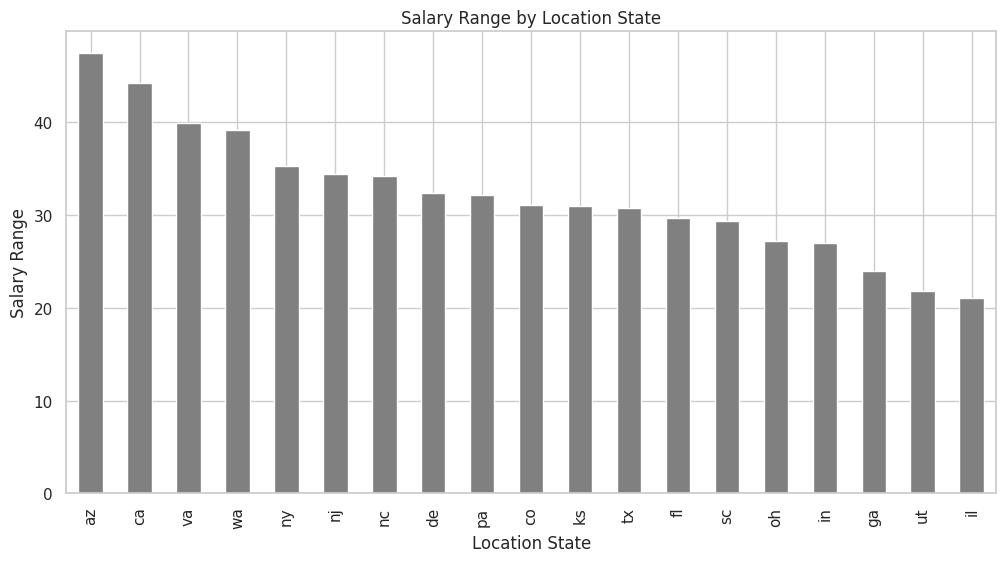

In [ ]:
average_range_salary_by_state = data.groupby('Location_State')['Salary_range'].mean()
average_range_salary_by_state = average_range_salary_by_state.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_range_salary_by_state.plot(kind='bar', color='grey')
plt.title('Salary Range by Location State')
plt.xlabel('Location State')
plt.ylabel('Salary Range')
plt.show()

Contextually, city and state might play a role in employee satisfaction with the job. The following cell explores if there is any correlation between state and employee ratings.

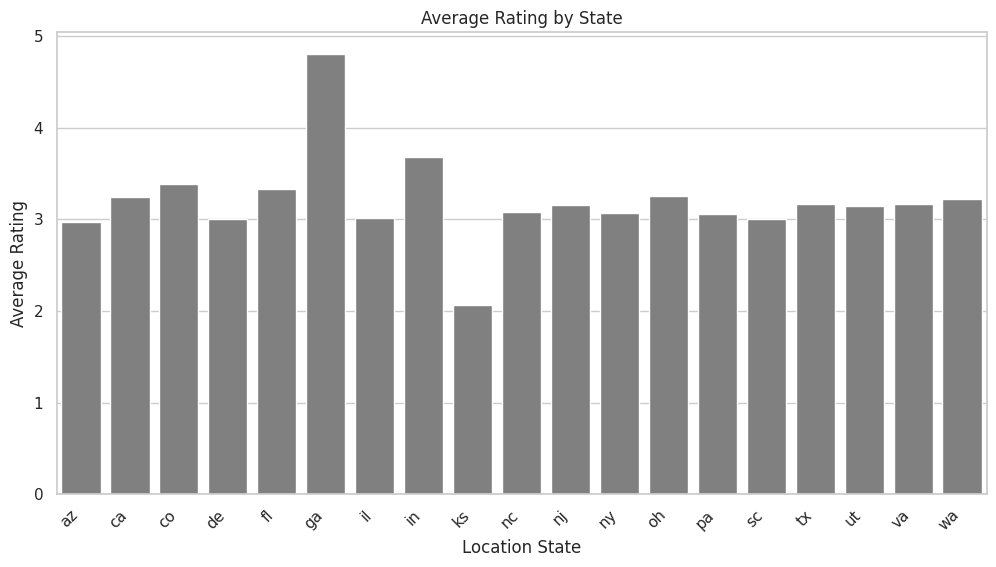

In [ ]:
average_rating_by_state = data.groupby('Location_State')['Rating'].mean()
plt.figure(figsize=(12, 6))
sb.barplot(x=average_rating_by_state.index, y=average_rating_by_state, color='Grey')
plt.title('Average Rating by State')
plt.xlabel('Location State')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

It seems as if all states have similar average ratings except for KS abd GA. However, the following cell provides a table of states and respective counts. GA and KS only have 3 ratings each and therefore a conclusion whether these states have higher ratings cannot be made.

In [ ]:
state_counts = data['Location_State'].value_counts().reset_index()
state_counts.columns = ['Location_State', 'Count']
state_counts

,Location_State,Count
0,ca,626
1,tx,394
2,ny,345
3,il,164
4,pa,114
5,az,97
6,co,96
7,nc,90
8,nj,86
9,wa,54


# Headquarters


The following cell looks at any sort of interaction between Headquarter location and job Location by state.

In [ ]:
data['Headquarters'] = data['Headquarters'].str.lower().str.replace(',', '')
data[['Headquarters_City', 'Headquarters_State']] = data['Headquarters'].str.extract(r'(.+?)\s*([a-zA-Z]{2})$')
data['Headquarters_City'] = data['Headquarters_City'].str.strip()
data[['Headquarters', 'Headquarters_City', 'Headquarters_State']].head()
data['HQ_&_Location'] = data['Headquarters_State'] == data['Location_State']

The two charts below suggest that, the location of the job being in the same state as the company's headquarters has no correlation to higher or lower salaries.

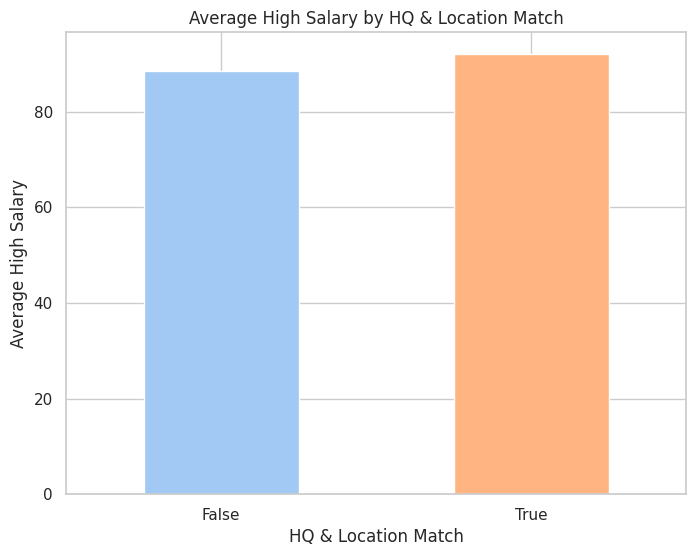

In [ ]:
average_high_salary_by_hq_location = data.groupby('HQ_&_Location')['High_Salary'].mean()
plt.figure(figsize=(8, 6))
average_high_salary_by_hq_location.plot(kind='bar', color=sb.color_palette('pastel'))
plt.title('Average High Salary by HQ & Location Match')
plt.xlabel('HQ & Location Match')
plt.ylabel('Average High Salary')
plt.xticks(rotation=0)
plt.show()

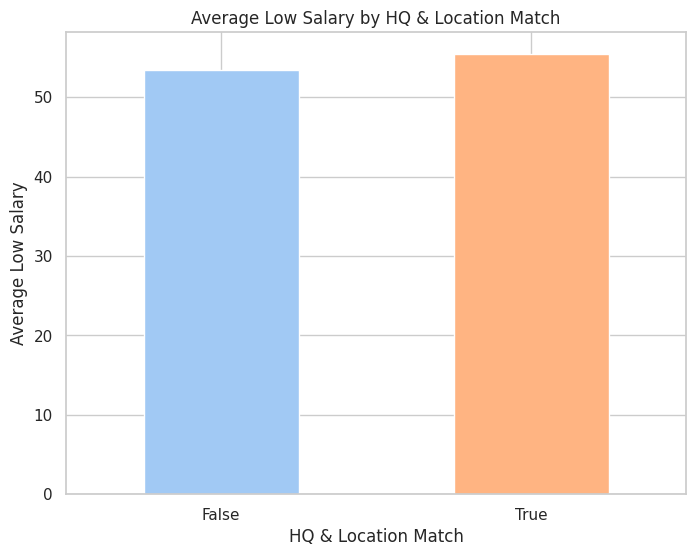

In [ ]:
average_low_salary_by_hq_location = data.groupby('HQ_&_Location')['Low_Salary'].mean()
plt.figure(figsize=(8, 6))
average_low_salary_by_hq_location.plot(kind='bar', color=sb.color_palette('pastel'))
plt.title('Average Low Salary by HQ & Location Match')
plt.xlabel('HQ & Location Match')
plt.ylabel('Average Low Salary')
plt.xticks(rotation=0)
plt.show()

# Company Size

The following cell looks at company size.

There does not seem to be significant differences between company size and salary expectation as well as employe ratings.

In [ ]:
data['Size'].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown', '-1'], dtype=object)

In [ ]:
size_data = data.groupby('Size').agg({'Size': 'count', 'High_Salary': 'mean', 'Low_Salary': 'mean', 'Rating':'mean'})
size_data.columns = ['Count', 'Average High Salary', 'Average Low Salary','Average Rating']
size_data

,Count,Average High Salary,Average Low Salary,Average Rating
Size,,,,
-1,163,91.392638,55.546012,-1.000000
1 to 50 employees,347,90.564841,54.858790,3.034294
10000+ employees,375,87.773333,52.141333,3.633067
1001 to 5000 employees,348,90.810345,54.928161,3.496839
201 to 500 employees,249,88.783133,53.602410,3.611647
5001 to 10000 employees,97,92.896907,55.505155,3.636082
501 to 1000 employees,211,89.450237,54.526066,3.647867
51 to 200 employees,421,90.702381,54.340476,3.738955
Unknown,42,88.238095,56.952381,1.330952


# Year Founded

The following cell looks at the "Founded" column in relation to salary expectations and ratings.

In [ ]:

def bin_founded(year):
    return (year // 25) * 25
data['Founded_Group'] = data['Founded'].apply(bin_founded)
founded_data = data.groupby('Founded_Group').agg({
    'Founded_Group': 'count',
    'High_Salary': 'mean',
    'Low_Salary': 'mean',
    'Rating': 'mean'
})
founded_data.columns = ['Count', 'Average High Salary', 'Average Low Salary', 'Average Rating']
founded_data


,Count,Average High Salary,Average Low Salary,Average Rating
Founded_Group,,,,
-25,660,90.101515,54.527273,1.869091
1675,2,97.500000,59.500000,3.650000
1725,5,60.400000,38.200000,4.300000
1775,21,85.000000,50.571429,3.633333
1800,12,83.666667,48.833333,3.625000
1825,11,87.727273,56.545455,3.745455
1850,37,80.243243,48.216216,3.497297
1875,36,76.138889,47.111111,3.655556
1900,61,87.524590,52.655738,3.540984


# Ownership Type

The following cell looks at type of ownership.

In [ ]:
data['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', '-1', 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

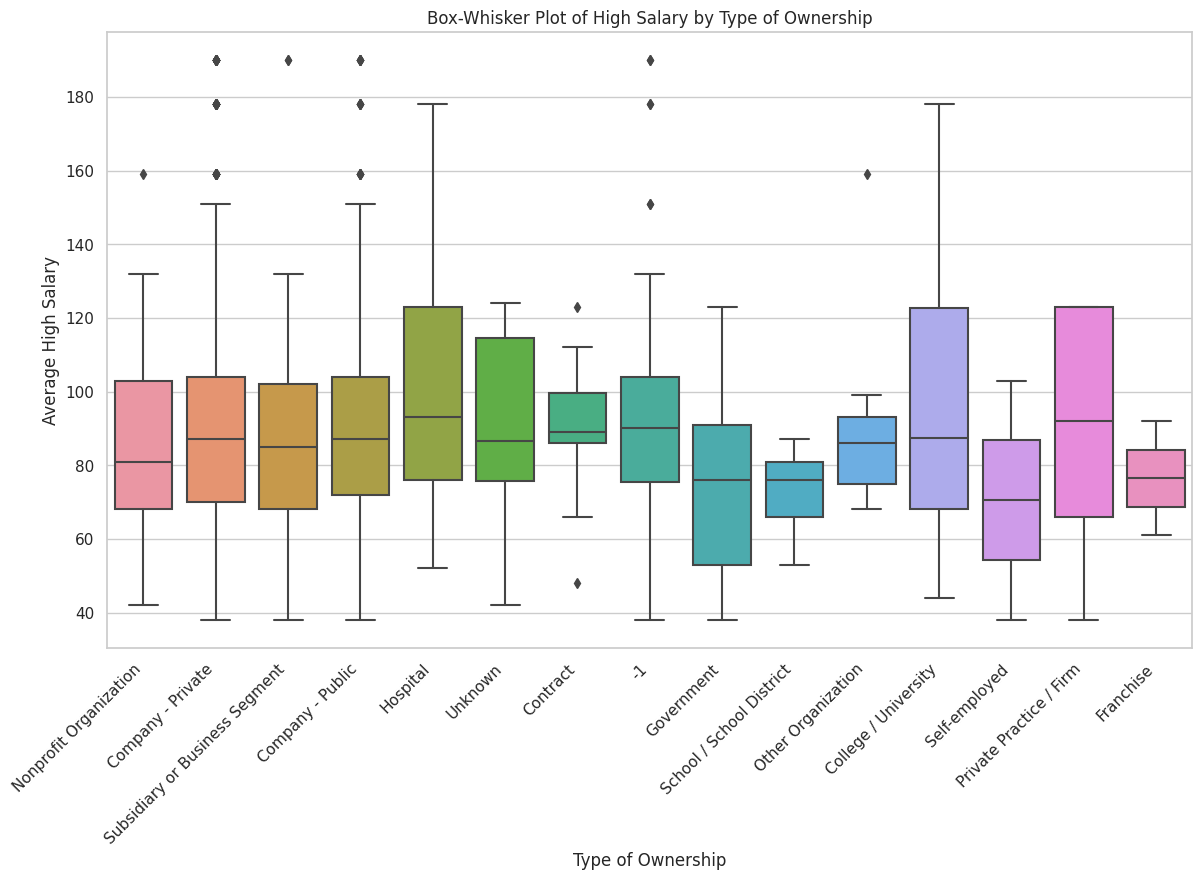

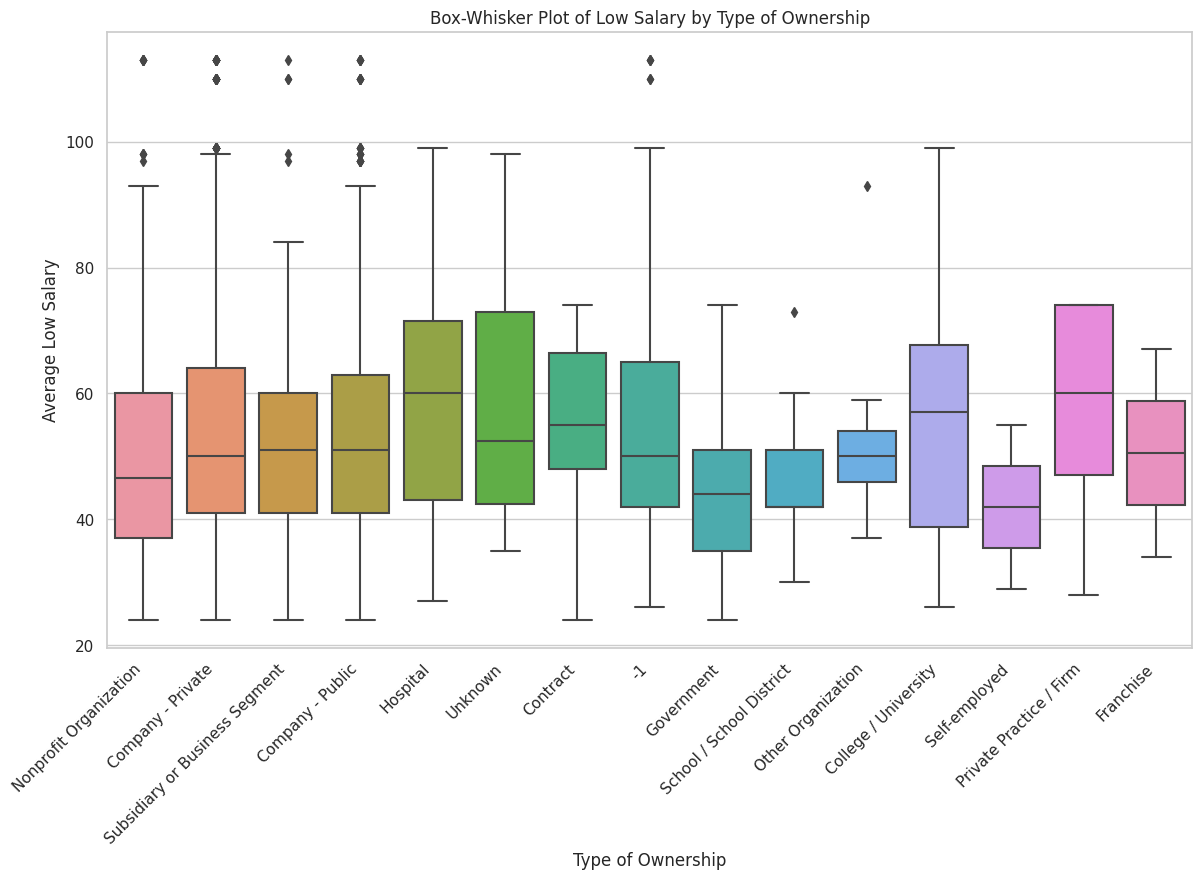

In [ ]:
# Create a box-whisker plot for 'Type of ownership' based on average 'High_Salary'
plt.figure(figsize=(14, 8))
sb.boxplot(x='Type of ownership', y='High_Salary', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Box-Whisker Plot of High Salary by Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Average High Salary')
plt.show()

# Create a box-whisker plot for 'Type of ownership' based on average 'Low_Salary'
plt.figure(figsize=(14, 8))
sb.boxplot(x='Type of ownership', y='Low_Salary', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Box-Whisker Plot of Low Salary by Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Low Salary')
plt.show()

In [ ]:
ownership_data = data.groupby('Type of ownership').agg({'Type of ownership': 'count', 'High_Salary': 'mean', 'Low_Salary': 'mean', 'Rating':'mean'})
ownership_data.columns = ['Count', 'Average High Salary', 'Average Low Salary','Average Rating']
ownership_data

,Count,Average High Salary,Average Low Salary,Average Rating
Type of ownership,,,,
-1,163,91.392638,55.546012,-1.000000
College / University,34,92.794118,53.882353,4.108824
Company - Private,1273,90.523585,54.475629,3.588531
Company - Public,452,91.050885,54.351770,3.346239
Contract,11,89.636364,55.363636,2.818182
Franchise,2,76.500000,50.500000,3.950000
Government,37,75.486486,45.189189,3.189189
Hospital,19,103.631579,59.789474,3.747368
Nonprofit Organization,124,84.314516,52.935484,3.187097


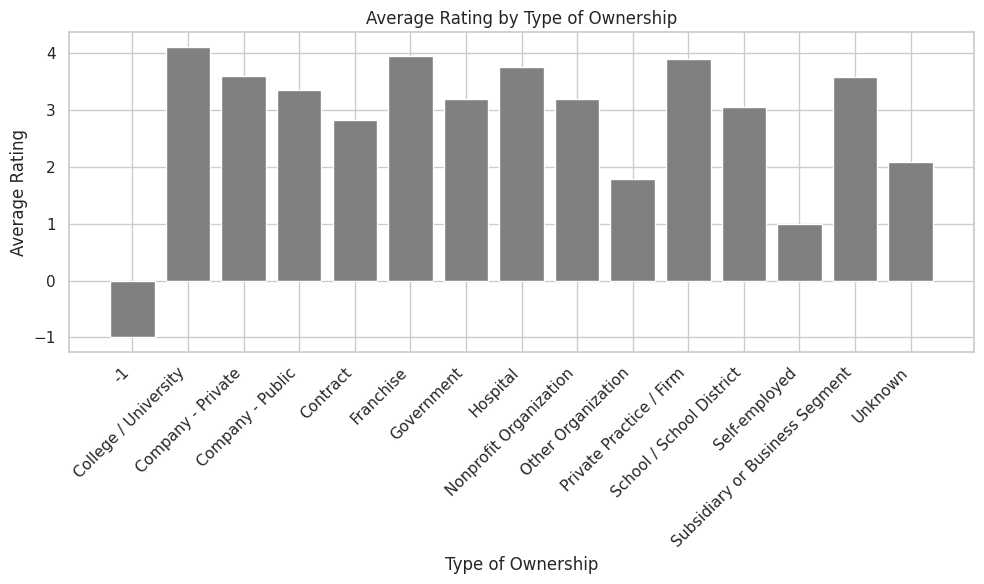

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ownership_data.index, ownership_data['Average Rating'], color='grey')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Rating')
plt.title('Average Rating by Type of Ownership')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Industry

The following cell looks into the different industries.

In [ ]:
data['Industry'].head(15).unique()


array(['Social Assistance', 'Health Care Services & Hospitals',
       'Internet', 'IT Services', 'Sports & Recreation',
       'Investment Banking & Asset Management', 'Insurance Carriers',
       'Venture Capital & Private Equity', 'Research & Development', '-1',
       'Advertising & Marketing', 'Brokerage Services'], dtype=object)

In [ ]:
len(data['Industry'].unique())

89

# Sector

The following cell looks at sector.

In [ ]:
data['Sector'].unique()

array(['Non-Profit', 'Health Care', 'Information Technology',
       'Arts, Entertainment & Recreation', 'Finance', 'Insurance',
       'Business Services', '-1', 'Restaurants, Bars & Food Services',
       'Media', 'Accounting & Legal', 'Real Estate', 'Government',
       'Retail', 'Consumer Services', 'Biotech & Pharmaceuticals',
       'Education', 'Construction, Repair & Maintenance',
       'Oil, Gas, Energy & Utilities', 'Manufacturing',
       'Aerospace & Defense', 'Telecommunications',
       'Transportation & Logistics', 'Mining & Metals',
       'Travel & Tourism'], dtype=object)

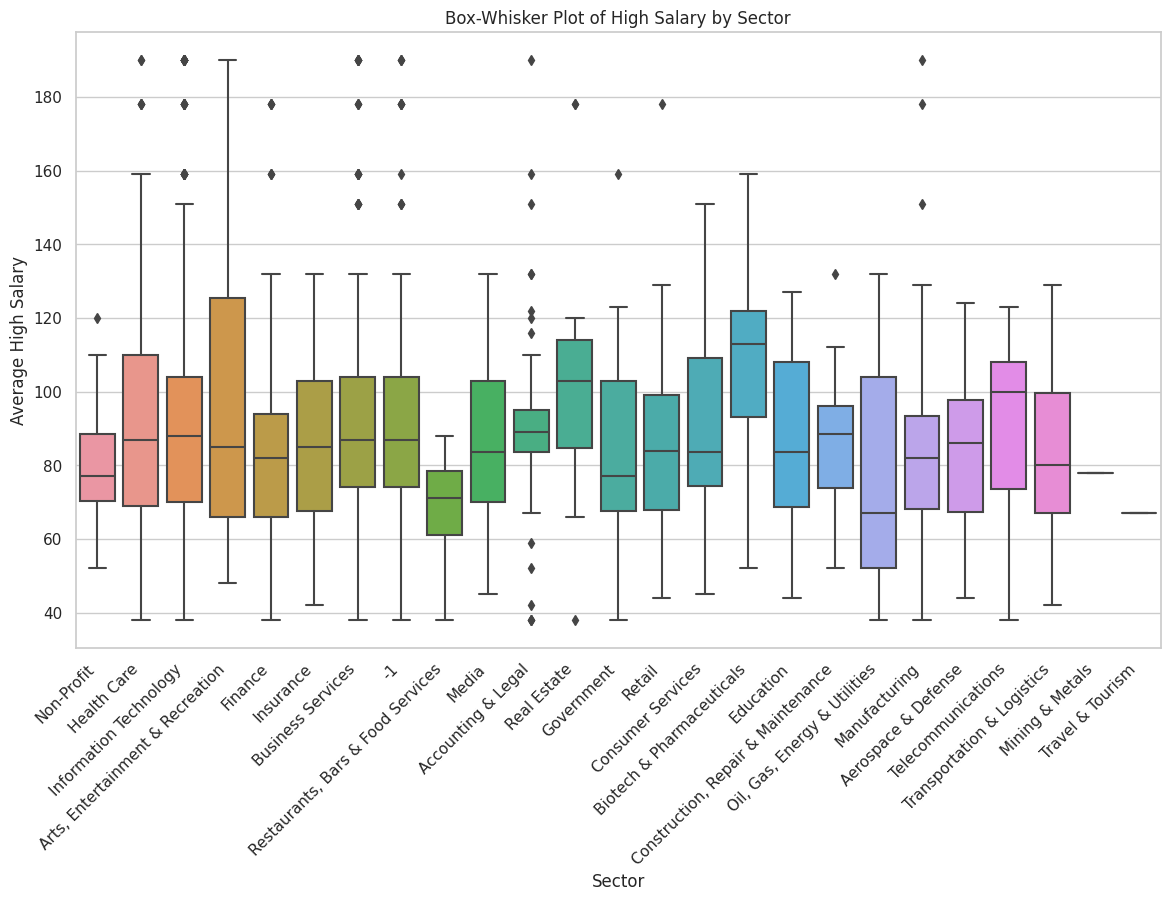

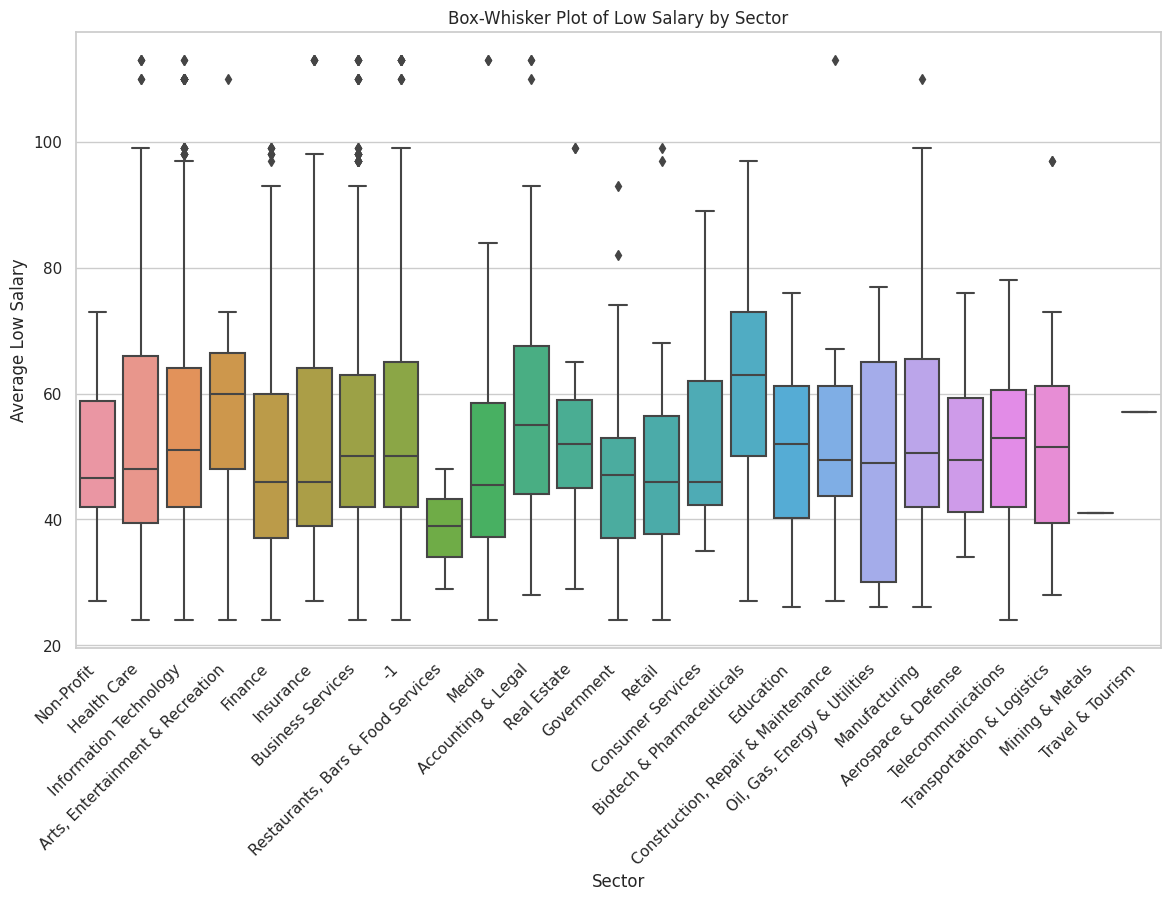

In [ ]:
plt.figure(figsize=(14, 8))
sb.boxplot(x='Sector', y='High_Salary', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Box-Whisker Plot of High Salary by Sector')
plt.xlabel('Sector')
plt.ylabel('Average High Salary')
plt.show()

# Create a box-whisker plot for 'Sector' based on average 'Low_Salary'
plt.figure(figsize=(14, 8))
sb.boxplot(x='Sector', y='Low_Salary', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Box-Whisker Plot of Low Salary by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Low Salary')
plt.show()

In [ ]:
sector_data = data.groupby('Sector').agg({'Sector': 'count', 'High_Salary': 'mean', 'Low_Salary': 'mean', 'Rating':'mean'})
sector_data.columns = ['Count', 'Average High Salary', 'Average Low Salary','Average Rating']
sector_data

,Count,Average High Salary,Average Low Salary,Average Rating
Sector,,,,
-1,353,90.444759,54.954674,0.596034
Accounting & Legal,43,91.930233,58.511628,3.741860
Aerospace & Defense,22,85.045455,51.954545,3.645455
"Arts, Entertainment & Recreation",7,100.857143,60.428571,3.800000
Biotech & Pharmaceuticals,33,104.848485,61.363636,3.390909
Business Services,524,90.038241,54.508604,3.654580
"Construction, Repair & Maintenance",16,88.125000,53.812500,2.150000
Consumer Services,14,89.857143,53.142857,3.528571
Education,52,87.326923,51.807692,3.900000


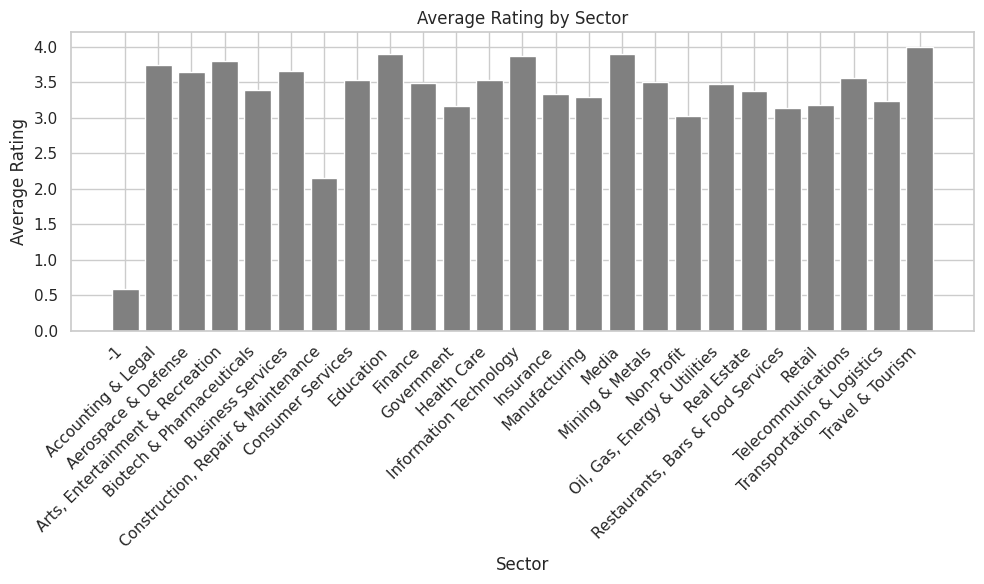

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sector_data.index, sector_data['Average Rating'], color='grey')
plt.xlabel('Sector')
plt.ylabel('Average Rating')
plt.title('Average Rating by Sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Revenue

The following cell looks at revenue.

In [ ]:
data['Revenue'].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       'Unknown / Non-Applicable', '$50 to $100 million (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)', '-1',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

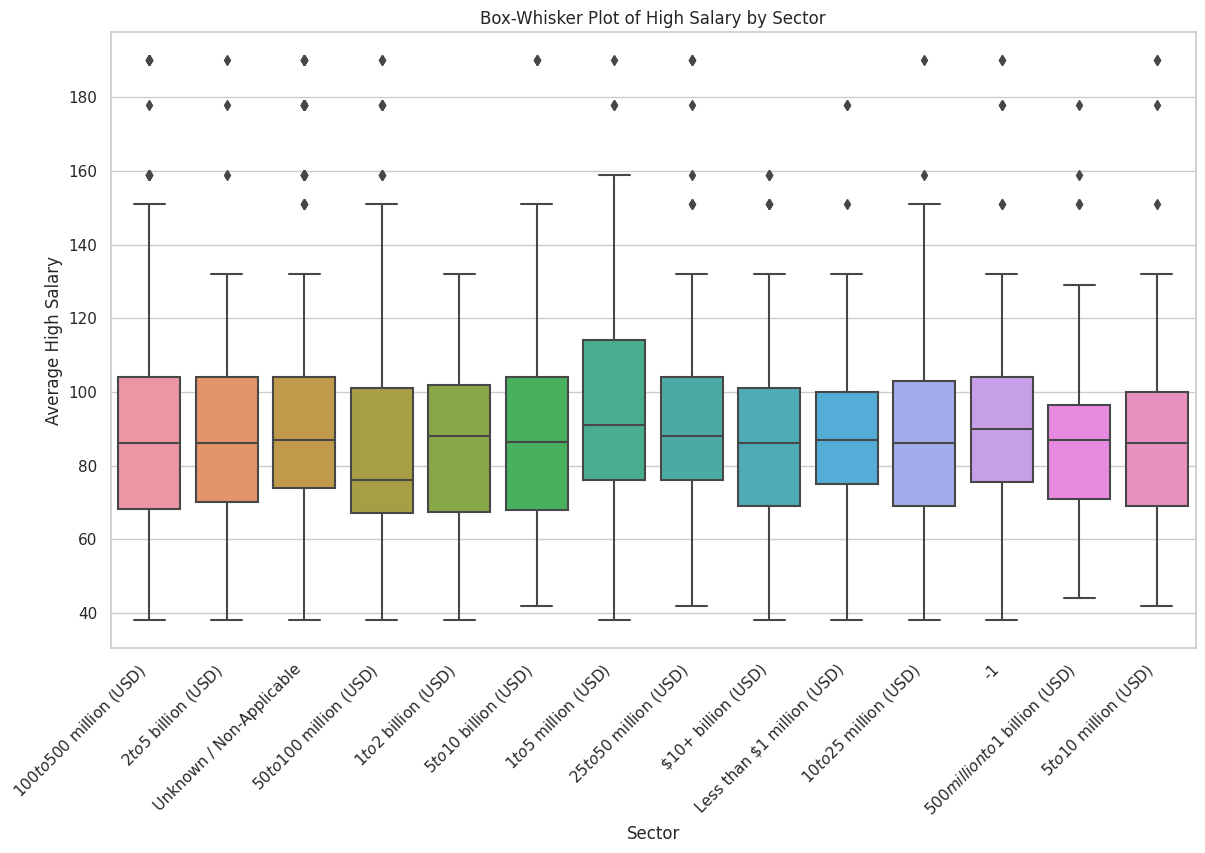

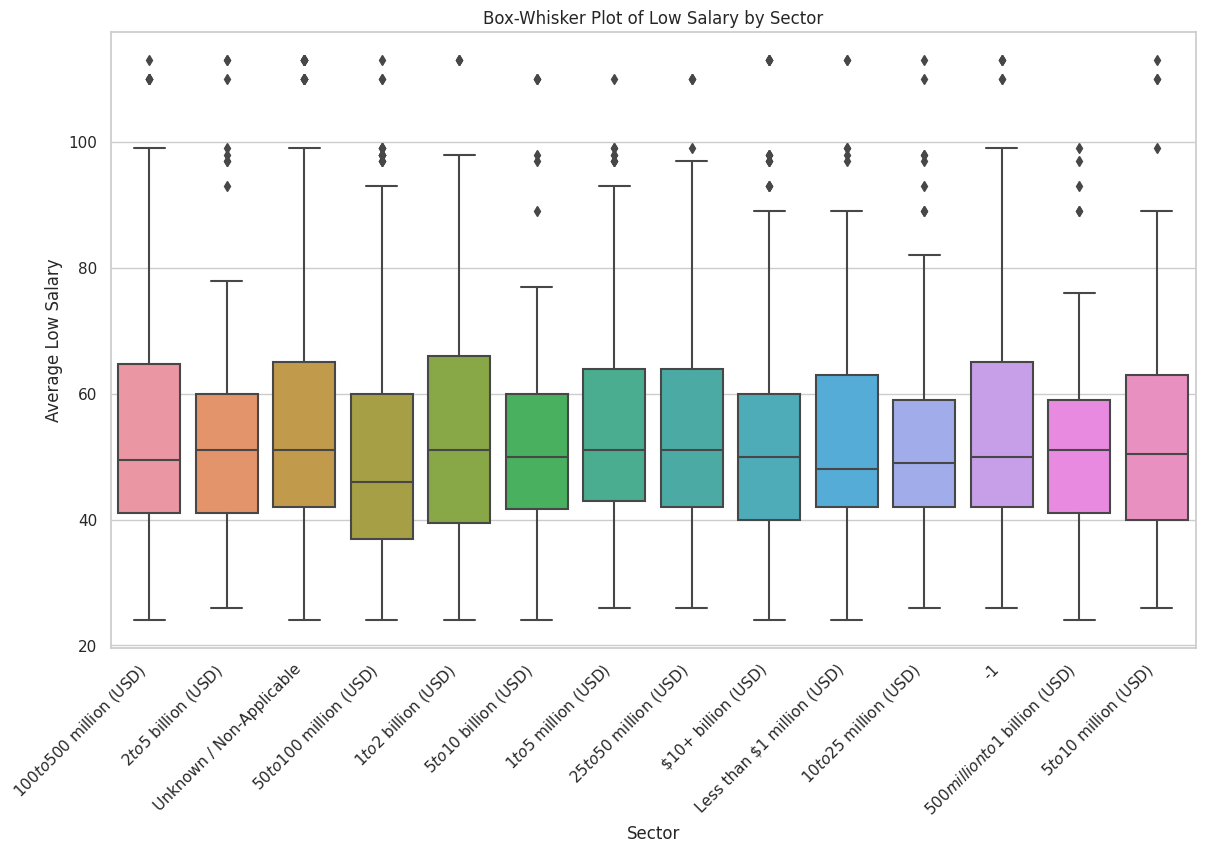

In [ ]:
plt.figure(figsize=(14, 8))
sb.boxplot(x='Revenue', y='High_Salary', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Box-Whisker Plot of High Salary by Revenue ')
plt.xlabel('Revenue')
plt.ylabel('Average High Salary')
plt.show()
plt.figure(figsize=(14, 8))
sb.boxplot(x='Revenue', y='Low_Salary', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Box-Whisker Plot of Low Salary by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Low Salary')
plt.show()

# Competitors

The following cell looks at competitors

In [ ]:
data['Competitors_Count'] = data['Competitors'].apply(lambda x: 0 if x == '-1' else x.count(',') + 1)
data['Competitors'] = data['Competitors'].replace('-1', np.nan)
data[['Competitors', 'Competitors_Count']].head(15)

,Competitors,Competitors_Count
0,NaN,0
1,NaN,0
2,GoDaddy,1
3,NaN,0
4,DraftKings,1
5,NaN,0
6,NaN,0
7,"Travelers, Chubb, Crum & Forster",3
8,"Thomson Reuters, Hearst, Pearson",3
9,"Signifyd, Forter",2


In [ ]:
competitor_data = data.groupby('Competitors_Count').agg({'Competitors_Count': 'count', 'High_Salary': 'mean', 'Low_Salary': 'mean', 'Rating':'mean'})
competitor_data.columns = ['Count', 'Average High Salary', 'Average Low Salary','Average Rating']
competitor_data

,Count,Average High Salary,Average Low Salary,Average Rating
Competitors_Count,,,,
0,1732,89.770653,54.143270,3.008718
1,34,98.588235,58.647059,3.473529
2,124,91.911290,56.524194,3.584677
3,362,89.585635,53.729282,3.711878
4,1,61.000000,34.000000,3.500000


# Easy Apply

The following code cell looks at Easy Apply.

In [ ]:
easy_apply_data = data.groupby('Easy Apply').agg({'Easy Apply': 'count', 'High_Salary': 'mean', 'Low_Salary': 'mean', 'Rating':'mean'})
easy_apply_data.columns = ['Count', 'Average High Salary', 'Average Low Salary','Average Rating']
easy_apply_data

,Count,Average High Salary,Average Low Salary,Average Rating
Easy Apply,,,,
-1,2173,89.748619,54.132136,3.137138
True,80,96.237500,57.925000,3.798750


# Final Dataset for models

In [ ]:
pd.set_option('display.max_colwidth', 50)

In [ ]:
data.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Easy Apply', 'job_title_length',
       'Length_Group', 'Low_Salary', 'High_Salary',
       'Job Description Keyword Count', 'Location_City', 'Location_State',
       'Headquarters_City', 'Headquarters_State', 'HQ_&_Location', 'skills',
       'skill_count', 'Skills_Group', 'Salary_range', 'Mean_Salary'],
      dtype='object')

In [ ]:
data['Mean_Salary'] = data[['High_Salary', 'Low_Salary']].mean(axis=1)


In [ ]:
final_data = data[['Rating', 'Location_State', 'Type of ownership','Sector','Mean_Salary']]

In [ ]:
final_data.head()

,Rating,Location_State,Type of ownership,Sector,Mean_Salary
0,3.2,ny,Nonprofit Organization,Non-Profit,51.5
1,3.8,ny,Nonprofit Organization,Health Care,51.5
2,3.4,ny,Company - Private,Information Technology,51.5
3,4.1,ny,Subsidiary or Business Segment,Information Technology,51.5
4,3.9,ny,Company - Private,"Arts, Entertainment & Recreation",51.5


# Linear Regression for Salary

In [ ]:
final_data.dropna(subset=['Mean_Salary'], inplace=True)
final_data_encoded = pd.get_dummies(final_data, columns=['Location_State', 'Type of ownership', 'Sector'], drop_first=True)
X = final_data_encoded.drop('Mean_Salary', axis=1)
y = final_data['Mean_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)



<ipython-input-198-5f406901812b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(subset=['Mean_Salary'], inplace=True)


In [ ]:
X_train_sm = sm.add_constant(X_train)  # add a constant term to the predictor variables
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            Mean_Salary   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     13.98
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          6.99e-102
Time:                        20:34:02   Log-Likelihood:                -7916.0
No. Observations:                1801   AIC:                         1.594e+04
Df Residuals:                    1745   BIC:                         1.625e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

# Linear Regression for Rating

In [ ]:
final_data.dropna(subset=['Rating'], inplace=True)
final_data_encoded = pd.get_dummies(final_data, columns=['Location_State', 'Type of ownership', 'Sector'], drop_first=True)
X = final_data_encoded.drop('Rating', axis=1)
y = final_data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

<ipython-input-200-df6a86e7e28a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(subset=['Rating'], inplace=True)


In [ ]:
X_train_sm = sm.add_constant(X_train)  # add a constant term to the predictor variables
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     50.81
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          8.67e-318
Time:                        20:39:07   Log-Likelihood:                -2626.6
No. Observations:                1801   AIC:                             5365.
Df Residuals:                    1745   BIC:                             5673.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------